In [1]:
import pandas as pd                      # import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential,Model
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Lambda,Input
import os
import cv2 as cv

In [2]:
path=r"C:\Users\Hrishikesh\Desktop\DL PROJECTS\DL\Cityscape Dataset"    #path of dataset

In [3]:
dis=os.listdir(path)                                                    # shows the list of folders in directory
dis

['Bridge',
 'Commercial',
 'Industrial',
 'Intersection',
 'Landmark',
 'Park',
 'Parking',
 'Playground',
 'Residential',
 'Stadium']

In [7]:
data=[]                                  # connects the path with files in directories
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)                # convert raw image into pixel intensity
        C=cv.resize(img,(150,150))      # resize the image
        T=dis.index(i)                  # save target variable in T
        data.append([C,T])              # Append the target in features in data

In [8]:
data

[[array([[[37, 39, 27],
          [37, 39, 27],
          [37, 39, 27],
          ...,
          [60, 73, 75],
          [57, 72, 74],
          [54, 68, 71]],
  
         [[37, 39, 27],
          [37, 39, 27],
          [37, 39, 27],
          ...,
          [50, 63, 65],
          [49, 64, 66],
          [59, 74, 76]],
  
         [[37, 39, 27],
          [37, 39, 27],
          [37, 39, 27],
          ...,
          [59, 71, 73],
          [64, 77, 79],
          [52, 67, 68]],
  
         ...,
  
         [[38, 46, 49],
          [41, 49, 52],
          [41, 48, 51],
          ...,
          [34, 39, 24],
          [34, 39, 24],
          [35, 40, 25]],
  
         [[34, 43, 46],
          [45, 54, 57],
          [42, 51, 54],
          ...,
          [34, 39, 24],
          [35, 40, 25],
          [36, 40, 26]],
  
         [[35, 44, 47],
          [42, 51, 54],
          [36, 45, 48],
          ...,
          [35, 40, 25],
          [35, 40, 26],
          [36, 41, 26]]], dtype=u

In [9]:
import random                # randomly shuffle the data
random.shuffle(data)

In [10]:
F=[]                         # append the features and target seoerately
T=[]
for i,j in data:
    F.append(i) 
    T.append(j)

In [11]:
F1=np.array(F)             # covert feature and target into array for faster cakculations
T1=np.array(T)

In [12]:
F=F1/255                   # min max scaling
F

array([[[[0.42352941, 0.48235294, 0.49411765],
         [0.42352941, 0.47058824, 0.49019608],
         [0.17647059, 0.21960784, 0.23529412],
         ...,
         [0.28235294, 0.28627451, 0.12941176],
         [0.28235294, 0.28627451, 0.12941176],
         [0.28235294, 0.28627451, 0.12941176]],

        [[0.41176471, 0.45882353, 0.4745098 ],
         [0.41176471, 0.45490196, 0.47058824],
         [0.15686275, 0.19607843, 0.21176471],
         ...,
         [0.27843137, 0.28235294, 0.1254902 ],
         [0.27843137, 0.28235294, 0.1254902 ],
         [0.27843137, 0.28235294, 0.1254902 ]],

        [[0.25490196, 0.30196078, 0.31764706],
         [0.24705882, 0.28235294, 0.29803922],
         [0.09411765, 0.11764706, 0.1372549 ],
         ...,
         [0.2745098 , 0.27843137, 0.12156863],
         [0.2745098 , 0.27843137, 0.12156863],
         [0.2745098 , 0.27843137, 0.12156863]],

        ...,

        [[0.08627451, 0.10588235, 0.10196078],
         [0.14901961, 0.16862745, 0.16470588]

In [13]:
T=pd.get_dummies(T1,dtype="int")    # dummies for target as no order matters
T

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,1,0,0,0
7996,0,0,0,0,0,0,1,0,0,0
7997,0,0,1,0,0,0,0,0,0,0
7998,0,0,0,0,0,0,0,0,0,1


## TRANSFER LEARNING MODELS:-

### VGG16:-

In [14]:
from keras.applications.vgg16 import VGG16,preprocess_input    # import transfer learning model VGG16


In [15]:
vgg=VGG16(input_shape=[150,150,3],                            # set parameters
         weights='imagenet',
         include_top=False)

In [16]:
for i in vgg.layers:                                          # avoid parameter updation
    i.trainable=False

In [17]:
x=Flatten()(vgg.output)                                      # flatten the output of model

In [18]:
y=Dense(60,activation="relu")(x)                             # add dense hidden layer

In [19]:
Z=Dense(80,activation="relu")(y)                             # add dense hidden layer

In [20]:
v=Dense(10,activation="softmax")(Z)                          # add output layer

In [21]:
model=Model(vgg.input,v)                                     # model is made

In [22]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=(["accuracy"])) 
                                                             # model is compiled and parameters are set

In [23]:
model.fit(F,T,epochs=2,validation_split=.15,batch_size=10)   # model is fit and trained

Epoch 1/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 382s 558ms/step - accuracy: 0.5215 - loss: 1.3685 - val_accuracy: 0.6708 - val_loss: 0.9659
Epoch 2/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 377s 554ms/step - accuracy: 0.8087 - loss: 0.5687 - val_accuracy: 0.7767 - val_loss: 0.6609


###### THE TRAINING ACCURACY FOR VGG16 MODEL IS 80.87 AND VALIDATION ACCURACY IS 77.67.

### VGG19:-

In [24]:
from keras.applications.vgg19 import VGG19,preprocess_input              # import transfer learning model VGG19

In [25]:
vgg=VGG19(input_shape=(150,150,3),weights="imagenet",include_top=False)  # set parameters

In [26]:
for i in vgg.layers:                                                     # avoid parameter updation
    i.trainable=False

In [27]:
x=Flatten()(vgg.output)                                                  # flatten the output of model

In [28]:
y=Dense(60,activation="relu")(x)                                         # add dense hidden layer

In [29]:
v=Dense(80,activation="relu")(y)                                         # add dense hidden layer

In [30]:
z=Dense(10,activation="softmax")(v)                                      # add output layer

In [31]:
model1=Model(vgg.input,z)                                                # intiailize the model

In [36]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=(["accuracy"]))
                                                                         # model is compiled and parameters are set

In [37]:
model1.fit(F,T,epochs=2,validation_split=.15,batch_size=10)              # model is fit and trained

Epoch 1/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 508s 742ms/step - accuracy: 0.5439 - loss: 1.3335 - val_accuracy: 0.6958 - val_loss: 0.9416
Epoch 2/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 500s 735ms/step - accuracy: 0.7946 - loss: 0.6001 - val_accuracy: 0.6967 - val_loss: 0.9117


###### THE TRAINING ACCURACY FOR VGG19 MODEL IS 79,46 AND VALIDATION ACCURACY IS 69.67

### GOOGLENET:-

In [49]:
from keras.applications import InceptionV3                               # import transfer learning model GoogleNet

In [50]:
inc=InceptionV3(weights="imagenet",input_shape=(150,150,3),include_top=False) # set parameters

In [51]:
for i in inc.layers:                                                     # avoid parameter updation
    i.trainable=False

In [52]:
x=Flatten()(inc.output)                                                  # flatten the output of model

In [53]:
y=Dense(60,activation="relu")(x)                                         # add dense hidden layer

In [54]:
v=Dense(80,activation="relu")(y)                                         # add dense hidden layer

In [55]:
z=Dense(10,activation="softmax")(v)                                      # add output layer

In [56]:
model3=Model(inc.input,z)                                                # intiailize the model

In [57]:
model3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=(["accuracy"]))
                                                                        # model is compiled and parameters are set

In [58]:
model3.fit(F,T,epochs=2,validation_split=.15,batch_size=10)             # model is fit and trained

Epoch 1/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 144s 199ms/step - accuracy: 0.5404 - loss: 1.7711 - val_accuracy: 0.6767 - val_loss: 0.9675
Epoch 2/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 135s 199ms/step - accuracy: 0.7797 - loss: 0.6746 - val_accuracy: 0.7708 - val_loss: 0.6970


###### THE TRAINING ACCURACY FOR GoogleNet MODEL IS 77.97 AND VALIDATION ACCURACY IS 77.08

### DENSENET:-

In [59]:
from keras.applications import DenseNet121                             # import transfer learning model DenseNet

In [60]:
den=DenseNet121(weights="imagenet",input_shape=(150,150,3),include_top=False) # set parameters

In [61]:
for i in den.layers:                                                  # avoid parameter updation
    i.trainable=False

In [62]:
x=Flatten()(den.output)                                               # flatten the output of model

In [63]:
y=Dense(60,activation="relu")(x)                                      # add dense hidden layer

In [64]:
v=Dense(80,activation="relu")(y)                                      # add dense hidden layer

In [65]:
z=Dense(10,activation="softmax")(v)                                   # add output layer

In [66]:
model4=Model(den.input,z)                                            # intiailize the model

In [67]:
model4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=(["accuracy"]))
                                                                     # model is compiled and parameters are set

In [68]:
model4.fit(F,T,epochs=2,validation_split=.15,batch_size=10)         # model is fit and trained

Epoch 1/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 314s 442ms/step - accuracy: 0.6606 - loss: 1.1384 - val_accuracy: 0.8150 - val_loss: 0.5881
Epoch 2/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 284s 418ms/step - accuracy: 0.8679 - loss: 0.4178 - val_accuracy: 0.8042 - val_loss: 0.6860


###### THE TRAINING ACCURACY FOR DenseNet MODEL IS 86.79 AND VALIDATION ACCURACY IS 80.42

### ACCURACY CHART:-

In [90]:
D={"MODEL":["VGG16","VGG19","GOOGLENET","DENSENET"],
   "TRAINING ACCURACY":[ 80.87,79.46,77.97,86.79 ],
   "VALIDATION ACCURACY":[77.67,69.67,77.08,80.42]}

In [91]:
b=pd.DataFrame(D)                                                  # creating a dataframe
b

,MODEL,TRAINING ACCURACY,VALIDATION ACCURACY
0,VGG16,80.87,77.67
1,VGG19,79.46,69.67
2,GOOGLENET,77.97,77.08
3,DENSENET,86.79,80.42


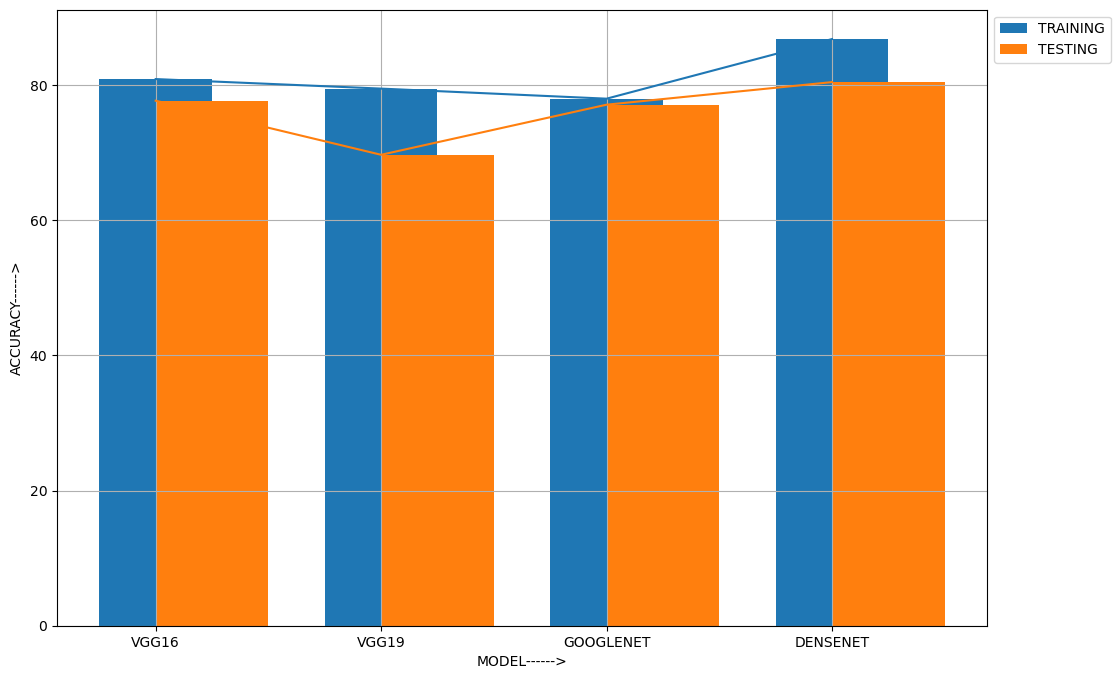

In [98]:
plt.figure(figsize=(12,8))
plt.bar(b["MODEL"],b["TRAINING ACCURACY"],width=.5,label="TRAINING")                # plotting the accuracy plot
plt.bar(b["MODEL"],b["VALIDATION ACCURACY"],align="edge",width=.5,label="TESTING")
plt.plot(b["MODEL"],b["TRAINING ACCURACY"])
plt.plot(b["MODEL"],b["VALIDATION ACCURACY"])
plt.xlabel("MODEL------>")
plt.ylabel("ACCURACY------>")
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.grid()
plt.show()

### CONCLUSION:-
#### FROM ABOVE GRAPH IT IS CLEAR THAT GOOGLENET WILL WORK BEST FOR THIS DATASET IMAGE CLASSIFICATION.